# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Dan Ahimbisibwe\
**Email:** da3658@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [7]:
from IPython.display import Markdown

answer = """**Generalization to new speakers**

- Split by full speakers so each person appears in only one group. For example: train on about 70 speakers, validate on 15, and test on 15. This checks if the model works for voices it has never seen.
- Keep each speaker’s clips grouped by day or session so very similar recordings do not leak across the splits.
- Use the validation speakers to tune the model and reserve the test speakers for final evaluation only.

**Adapting to Kilian while staying general**

- Keep the same speaker-holdout strategy for the full multi-speaker dataset so the base model is measured on voices it never saw.
- Make a separate split only for Kilian, for example 70% train, 15% validation, and 15% test based on time or session.
- Fine tune or re-weight training so Kilian’s data has more influence, while tracking two metrics: performance on the general-validation set and on the Kilian-validation set.
- Report both results so it is clear how well the model improves for Kilian and how well it still handles other speakers.
"""
display(Markdown(answer))


**Generalization to new speakers**

- Split by full speakers so each person appears in only one group. For example: train on about 70 speakers, validate on 15, and test on 15. This checks if the model works for voices it has never seen.
- Keep each speaker’s clips grouped by day or session so very similar recordings do not leak across the splits.
- Use the validation speakers to tune the model and reserve the test speakers for final evaluation only.

**Adapting to Kilian while staying general**

- Keep the same speaker-holdout strategy for the full multi-speaker dataset so the base model is measured on voices it never saw.
- Make a separate split only for Kilian, for example 70% train, 15% validation, and 15% test based on time or session.
- Fine tune or re-weight training so Kilian’s data has more influence, while tracking two metrics: performance on the general-validation set and on the Kilian-validation set.
- Report both results so it is clear how well the model improves for Kilian and how well it still handles other speakers.


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


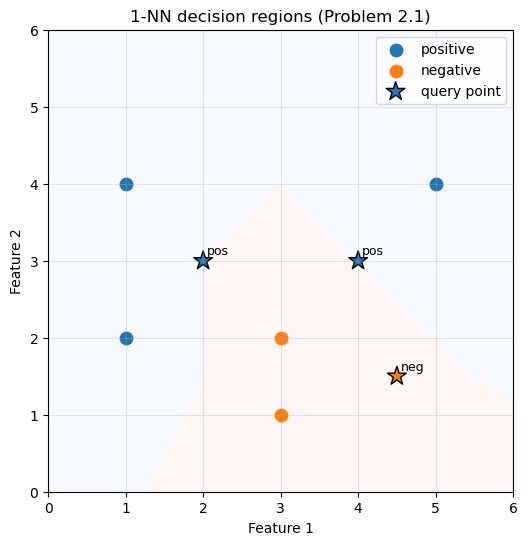

1-NN label for [500, 1] before scaling: positive
1-NN label after per-feature min-max scaling: negative
Handling missing features: compute distances on the subset of shared features, optionally imputing with training-set statistics and scaling distances by the fraction of observed dimensions so points with many missing values are not unfairly favoured.
Why K-NN can work for images: with appropriate normalization or learned embeddings, images of the same class cluster on low-dimensional manifolds inside pixel space, so nearest neighbours remain semantically meaningful even though the raw dimension is large.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

positive = np.array([[1, 2], [1, 4], [5, 4]])
negative = np.array([[3, 1], [3, 2]])
X = np.vstack([positive, negative])
y = np.array([1] * len(positive) + [-1] * len(negative))

def knn_1_predict(point, data, labels):
    distances = np.linalg.norm(data - point, axis=1)
    return labels[np.argmin(distances)]

grid_x, grid_y = np.meshgrid(np.linspace(0, 6, 200), np.linspace(0, 6, 200))
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_pred = np.array([knn_1_predict(p, X, y) for p in grid_points]).reshape(grid_x.shape)

fig, ax = plt.subplots(figsize=(6, 6))
cmap = ListedColormap(["#ffefef", "#eef7ff"])
ax.contourf(grid_x, grid_y, grid_pred, levels=[-1, 0, 1], alpha=0.5, cmap=cmap)
ax.scatter(positive[:, 0], positive[:, 1], color="tab:blue", label="positive", s=80)
ax.scatter(negative[:, 0], negative[:, 1], color="tab:orange", label="negative", s=80)

test_points = np.array([[2, 3], [4, 3], [4.5, 1.5]])
test_preds = np.array([knn_1_predict(p, X, y) for p in test_points])
colors = np.where(test_preds == 1, "tab:blue", "tab:orange")
ax.scatter(test_points[:, 0], test_points[:, 1], c=colors, marker="*", s=200, edgecolor="k", label="query point")

for point, pred in zip(test_points, test_preds):
    ax.text(point[0] + 0.05, point[1] + 0.08, "pos" if pred == 1 else "neg", fontsize=9)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("1-NN decision regions (Problem 2.1)")
ax.grid(alpha=0.3)
ax.legend(loc="upper right")
plt.show()

second_positive = np.array([[100, 2], [100, 4], [500, 4]])
second_negative = np.array([[300, 1], [300, 2]])
second_X = np.vstack([second_positive, second_negative])
second_y = np.array([1] * len(second_positive) + [-1] * len(second_negative))
query = np.array([500, 1])

raw_pred = knn_1_predict(query, second_X, second_y)

mins = second_X.min(axis=0)
maxs = second_X.max(axis=0)
scaled_X = (second_X - mins) / (maxs - mins)
scaled_query = (query - mins) / (maxs - mins)
scaled_pred = knn_1_predict(scaled_query, scaled_X, second_y)

print(f"1-NN label for {query.tolist()} before scaling: {'positive' if raw_pred == 1 else 'negative'}")
print(f"1-NN label after per-feature min-max scaling: {'positive' if scaled_pred == 1 else 'negative'}")

missing_feature_note = (
    "Handling missing features: compute distances on the subset of shared features, optionally imputing with "
    "training-set statistics and scaling distances by the fraction of observed dimensions so points with many "
    "missing values are not unfairly favoured."
)
print(missing_feature_note)

high_dim_note = (
    "Why K-NN can work for images: with appropriate normalization or learned embeddings, images of the same class "
    "cluster on low-dimensional manifolds inside pixel space, so nearest neighbours remain semantically meaningful "
    "even though the raw dimension is large."
)
print(high_dim_note)


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [3]:
from IPython.display import Markdown

explanation = r"""**1. Evaluating $h(x) = \operatorname{sign}(w \cdot x)$ on every sample**

- Generating predictions on $D_{TR}$ and $D_{TE}$ is only the first step; by itself it does not tell us whether the test error exceeds the training error?we still need to compare those predictions against the labels to compute empirical error rates. The loop is necessary, but it does not by itself answer the question.

**2. No need to recompute the Perceptron training error**

- The Perceptron updates only on mistakes. After convergence on a linearly separable dataset the final classifier has zero training error by construction, and the number of mistakes recorded during learning already equals the count of misclassified training samples. Re-running evaluation on the training set is redundant.
"""
display(Markdown(explanation))


**1. Evaluating $h(x) = \operatorname{sign}(w \cdot x)$ on every sample**

- Generating predictions on $D_{TR}$ and $D_{TE}$ is only the first step; by itself it does not tell us whether the test error exceeds the training error?we still need to compare those predictions against the labels to compute empirical error rates. The loop is necessary, but it does not by itself answer the question.

**2. No need to recompute the Perceptron training error**

- The Perceptron updates only on mistakes. After convergence on a linearly separable dataset the final classifier has zero training error by construction, and the number of mistakes recorded during learning already equals the count of misclassified training samples. Re-running evaluation on the training set is redundant.


### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [4]:
import numpy as np

data = [
    (np.array([10.0, -2.0]), 1),
    (np.array([12.0, 2.0]), -1),
]

w = np.zeros(2)
updates = []
max_epochs = 50

for epoch in range(1, max_epochs + 1):
    mistakes = 0
    for x, y in data:
        if y * np.dot(w, x) <= 0:
            w = w + y * x
            updates.append({"epoch": epoch, "weights": w.copy(), "x": x.copy(), "y": y})
            mistakes += 1
    if mistakes == 0:
        break

print(f"Total updates until convergence: {len(updates)}")
for idx, step in enumerate(updates, start=1):
    x = step["x"]
    y = step["y"]
    weights = step["weights"]
    print(f"Update {idx:2d} (epoch {step['epoch']}, sample {x.tolist()} with label {int(y)}): w = {weights.tolist()}")
print(f"Final weight vector: {w.tolist()}")


Total updates until convergence: 9
Update  1 (epoch 1, sample [10.0, -2.0] with label 1): w = [10.0, -2.0]
Update  2 (epoch 1, sample [12.0, 2.0] with label -1): w = [-2.0, -4.0]
Update  3 (epoch 2, sample [10.0, -2.0] with label 1): w = [8.0, -6.0]
Update  4 (epoch 2, sample [12.0, 2.0] with label -1): w = [-4.0, -8.0]
Update  5 (epoch 3, sample [10.0, -2.0] with label 1): w = [6.0, -10.0]
Update  6 (epoch 3, sample [12.0, 2.0] with label -1): w = [-6.0, -12.0]
Update  7 (epoch 4, sample [10.0, -2.0] with label 1): w = [4.0, -14.0]
Update  8 (epoch 4, sample [12.0, 2.0] with label -1): w = [-8.0, -16.0]
Update  9 (epoch 5, sample [10.0, -2.0] with label 1): w = [2.0, -18.0]
Final weight vector: [2.0, -18.0]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [5]:
import numpy as np

updates = [
    {"x": (0, 0, 0, 0, 4), "y": 1, "count": 2},
    {"x": (0, 0, 6, 5, 0), "y": 1, "count": 1},
    {"x": (3, 0, 0, 0, 0), "y": -1, "count": 1},
    {"x": (0, 9, 3, 6, 0), "y": -1, "count": 1},
    {"x": (0, 1, 0, 2, 5), "y": -1, "count": 1},
]

w = np.zeros(5, dtype=int)

print("Perceptron updates:")
for row in updates:
    delta = row["count"] * row["y"] * np.array(row["x"], dtype=int)
    w += delta
    print(f"  x={row['x']}, y={row['y']}, count={row['count']} -> delta={delta.tolist()}")

print(f"Final weight vector: {w.tolist()}")


Perceptron updates:
  x=(0, 0, 0, 0, 4), y=1, count=2 -> delta=[0, 0, 0, 0, 8]
  x=(0, 0, 6, 5, 0), y=1, count=1 -> delta=[0, 0, 6, 5, 0]
  x=(3, 0, 0, 0, 0), y=-1, count=1 -> delta=[-3, 0, 0, 0, 0]
  x=(0, 9, 3, 6, 0), y=-1, count=1 -> delta=[0, -9, -3, -6, 0]
  x=(0, 1, 0, 2, 5), y=-1, count=1 -> delta=[0, -1, 0, -2, -5]
Final weight vector: [-3, -10, 3, -3, 3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Perceptron converged in 1 updates and 2 epochs.
Update  1: epoch 1 - sample [2.0, 2.0] with label 1 -> w = [1. 2. 2.]


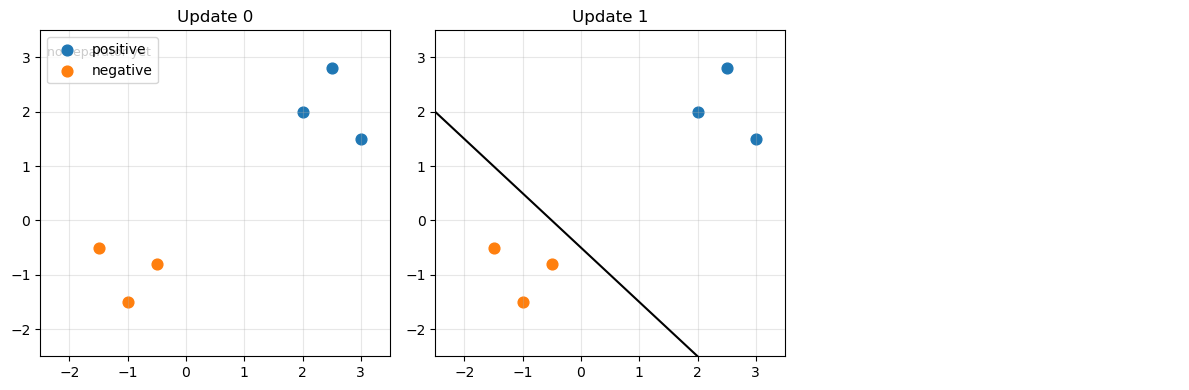

In [6]:
import numpy as np
import matplotlib.pyplot as plt

positive = np.array([[2.0, 2.0], [2.5, 2.8], [3.0, 1.5]])
negative = np.array([[-1.5, -0.5], [-1.0, -1.5], [-0.5, -0.8]])

X = np.vstack([positive, negative])
y = np.array([1] * len(positive) + [-1] * len(negative))
X_aug = np.hstack([np.ones((X.shape[0], 1)), X])

weights = np.zeros(X_aug.shape[1])
history = [weights.copy()]
updates = []

max_epochs = 20

for epoch in range(1, max_epochs + 1):
    mistakes = 0
    for xi, yi in zip(X_aug, y):
        if yi * np.dot(weights, xi) <= 0:
            weights = weights + yi * xi
            updates.append({"epoch": epoch, "weights": weights.copy(), "point": xi[1:].copy(), "label": yi})
            history.append(weights.copy())
            mistakes += 1
    if mistakes == 0:
        break

print(f"Perceptron converged in {len(updates)} updates and {epoch} epochs.")
for idx, step in enumerate(updates, start=1):
    point = step["point"]
    label = step["label"]
    print(f"Update {idx:2d}: epoch {step['epoch']} - sample {point.tolist()} with label {int(label)} -> w = {np.round(step['weights'], 3)}")

cols = 3
rows = int(np.ceil(len(history) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), squeeze=False)

x_range = np.linspace(-2.5, 3.5, 200)

for idx, w in enumerate(history):
    ax = axes[idx // cols][idx % cols]
    ax.scatter(positive[:, 0], positive[:, 1], color="tab:blue", s=60, label="positive" if idx == 0 else None)
    ax.scatter(negative[:, 0], negative[:, 1], color="tab:orange", s=60, label="negative" if idx == 0 else None)

    if np.linalg.norm(w[1:]) < 1e-8:
        ax.text(0.02, 0.92, "no separator yet", transform=ax.transAxes, fontsize=9)
    elif abs(w[2]) > 1e-8:
        y_boundary = -(w[0] + w[1] * x_range) / w[2]
        ax.plot(x_range, y_boundary, color="k")
    else:
        ax.axvline(x=-w[0] / w[1], color="k")

    ax.set_title(f"Update {idx}")
    ax.set_xlim(-2.5, 3.5)
    ax.set_ylim(-2.5, 3.5)
    ax.grid(alpha=0.3)

for ax in axes.ravel()[len(history):]:
    ax.axis("off")

axes[0, 0].legend(loc="upper left")
plt.tight_layout()
plt.show()
